In [90]:
%reload_ext autoreload
%autoreload 2

from asi import path_config

session2 = path_config.measurements / "session2"

In [91]:
import matplotlib.pyplot as plt

from asi.draw import reconstruct_rgb, reconstruct_rgb_envi
from asi.preprocess import load_white_corrected

specim_iq = session2 / "SpecimIQ" / "415" / "capture"

image_path = specim_iq / "415"
darkref_path = specim_iq / "DARKREF_415"
whiteref_path = specim_iq / "WHITEREF_415"

spectral_image, envi_header = load_white_corrected(image_path, whiteref_path, darkref_path)

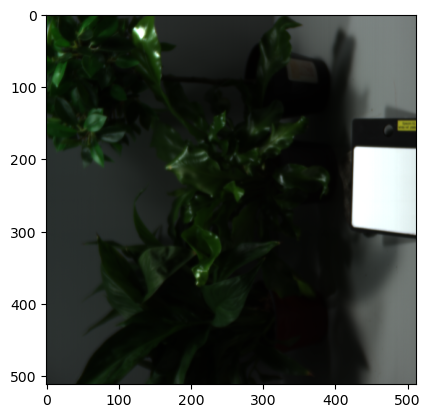

In [92]:
rgb_view = reconstruct_rgb_envi(spectral_image, envi_header)
rgb_view *= 1.5
rgb_view.clip(0, 1, out=rgb_view)
plt.imshow(rgb_view)

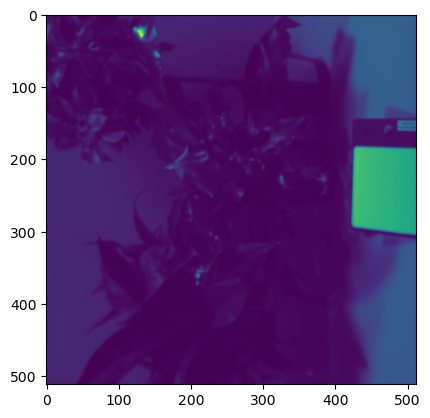

In [93]:
plt.imshow(spectral_image[..., 87])


# Nuance camera

In [94]:
import numpy as np

from asi.io import load_nuance_image

nuance = session2 / "Nuance"

greenmaterials_root = nuance / "greenmaterials"


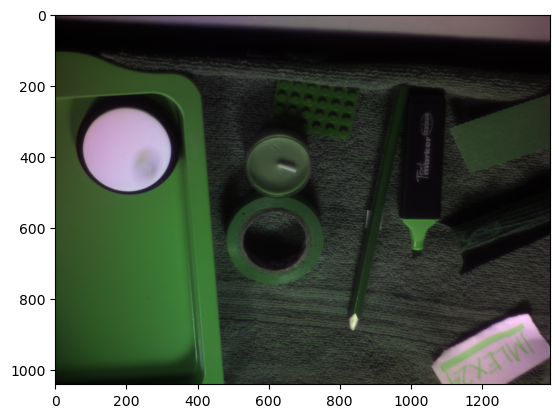

In [95]:
from asi.preprocess import white_correction_sq

spectral_image, wavelengths = load_nuance_image(greenmaterials_root)
spectral_image = spectral_image.astype(np.float64)

# White correction with selected area
white_pos = (slice(370, 430), slice(100, 200))
white_sq = spectral_image[white_pos]
whiteref = white_sq.mean((0, 1))
white_corrected = spectral_image / whiteref

rgb = reconstruct_rgb(white_corrected, wavelengths)
rgb = np.stack([rgb[..., 1], rgb[..., 2], rgb[..., 0]], axis=-1)

plt.imshow(rgb)

## Save nuance image as ENVI format

In [96]:
lines, samples, bands = spectral_image.shape
print(spectral_image.shape)
spectral_image_uint16 = (spectral_image).astype(np.uint16)
bil_format = spectral_image_uint16.transpose(0, 2, 1).flatten()

bil_format.tofile("saveddata/nuance.raw")
bil_format.shape

(1040, 1392, 51)


(73831680,)

In [97]:
reversed_wavelengths = wavelengths[::-1]
wavelengths_hdr = ",\n\t".join(map(str, reversed_wavelengths))
wavelengths_hdr = f"wavelength = {{\n\t{wavelengths_hdr}\n}}"

header_content = f"""ENVI
ENVI description = {{File Imported into ENVI}}
file type = ENVI
lines = {lines}
samples = {samples}
bands = {bands}
interleave = bil
data type = 12
header offset = 0
byte order = 0
{wavelengths_hdr}
"""
with open("saveddata/nuance.hdr", "w") as f:
    f.write(header_content)

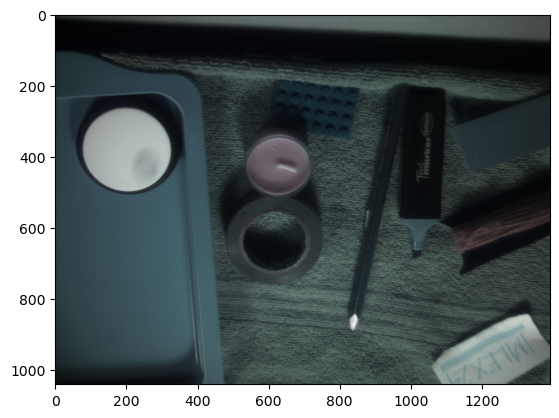

In [98]:
from pathlib import Path

from asi.io.load_envi import load_spectral_image

sp, hdr = load_spectral_image(Path("saveddata/nuance"))


rgb_view = reconstruct_rgb_envi(sp, hdr)
plt.imshow(rgb_view)

# Tunable

In [99]:
from asi.io import load_tunable_image

tunable_root = session2 / "Tunable"

greenmaterials_root = tunable_root / "green materials"


In [100]:
white_pos = slice(600, 700), slice(250, 310)
spectral_image, channels = load_tunable_image(greenmaterials_root, white_pos)

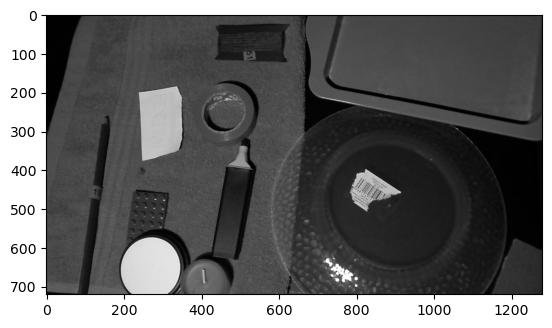

In [14]:
plt.imshow(spectral_image[..., [2, 3, 9]])

## Save tunable image as ENVI format

In [101]:
lines, samples, bands = spectral_image.shape
print(spectral_image.shape)
spectral_image_uint16 = (spectral_image).astype(np.uint16)
bil_format = spectral_image_uint16.transpose(0, 2, 1).flatten()

bil_format.tofile("saveddata/tunable.raw")
bil_format.shape

(720, 1280, 10)


(9216000,)

In [102]:

header_content = f"""ENVI
ENVI description = {{File Imported into ENVI}}
file type = ENVI
lines = {lines}
samples = {samples}
bands = {bands}
interleave = bil
data type = 12
header offset = 0
byte order = 0
"""
with open("saveddata/tunable.hdr", "w") as f:
    f.write(header_content)

## White correction

In [15]:
spectral_image = white_correction_sq(spectral_image, white_pos)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


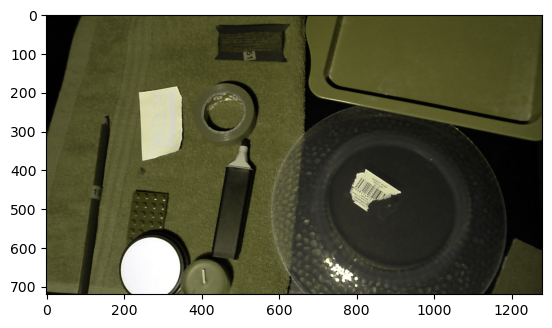

In [31]:
plt.imshow(spectral_image[..., [5, 9, 1]])